In [5]:
import praw
reddit = praw.Reddit(client_id='RfXfQdzvbbjjqA',
                     client_secret='Maos8fj7b2iDTgaa52opam-7uH4',
                     user_agent='Test',
                    username = 'iamcool_7',
                    password = 'iamcool@77890')

In [8]:
# import pprintx
import urllib.request, json 
with urllib.request.urlopen('https://www.reddit.com/r/india/comments/fyc817/found_my_autograph_diary_while_going_through_some/.json') as url:
    data = json.loads(url.read().decode())
    print(data)

[{'kind': 'Listing', 'data': {'modhash': '', 'dist': 1, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'india', 'selftext': '', 'user_reports': [], 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': "Found my autograph diary while going through some of my old stuff. Here is Dr Kalam's autograph I took 16 years ago.", 'link_flair_richtext': [{'e': 'text', 't': 'Non-Political'}], 'subreddit_name_prefixed': 'r/india', 'hidden': False, 'pwls': 6, 'link_flair_css_class': 'Non-Political', 'downs': 0, 'thumbnail_height': 140, 'parent_whitelist_status': 'all_ads', 'hide_score': False, 'name': 't3_fyc817', 'quarantine': False, 'link_flair_text_color': 'dark', 'upvote_ratio': 0.96, 'author_flair_background_color': None, 'subreddit_type': 'public', 'ups': 5762, 'total_awards_received': 3, 'media_embed': {}, 'thumbnail_width': 140, 'author_flair_template_id': None, 'is_original_content': False, 'author_fullname': 't2_qmx7q', 'secure_media'

In [ ]:
rposts = []
import pandas as pd
import urllib.request, json
count = 10
URL1 = "https://gateway.reddit.com/desktopapi/v1/subreddits/india?rtj=only&redditWebClient=web2x&app=web2x-client-production&allow_over18=&include=identity&after="
token = "t3_fwf6a9"
URL2 = "&layout=card&sort=new&geo_filter=IN"
# URL = URL1 + str(token) + "&dict=" + str(count%10) + URL2
while(count > 0):
    i = 10
    flag = 0
    while(flag != 1):
        if(i < 2):
            break
        URL =  URL1 + str(token) + "&dict=" + str(i) + URL2 
        i = i - 1
        try:
            with urllib.request.urlopen(URL) as url:
                data = json.loads(url.read().decode())
        #         print(type(data['posts']))
                jsonData = data['posts']
                for post in jsonData:
                    if(len(post) == 9):
                        #print(post)
                        rposts.append([jsonData[post]['title'], jsonData[post]['score'], jsonData[post]['id'],  jsonData[post]['numComments'], jsonData[post]['created']])
                token = data['token']
                flag = -1
        except:
            pass
    count = count - 1;
#     URL =  URL1 + token + "&dict=" + str(count%11) + URL2 
rposts = pd.DataFrame(rposts,columns=['title', 'score', 'id',  'num_comments',  'created'])
rposts

In [26]:
rposts = []
import pandas as pd
import numpy as np
import urllib.request, json

URL = 'https://api.pushshift.io/reddit/search/submission/?subreddit=india&sort=desc&sort_type=created_utc&after=1523588521&before=1586596417&size=100000'
with urllib.request.urlopen(URL) as url:
    data = json.loads(url.read().decode())
#     print(type(data['posts']))
    jsonData = data['data']
    for post in jsonData:
#         print(post.keys)
        if (post.get("link_flair_text") != None and post.get('selftext') != None):
            rposts.append([post['title'],post['selftext'],post['link_flair_text'],post["link_flair_background_color"],post['link_flair_text_color'], post['score'],  post['num_comments'], post['created_utc']])
        elif post.get("link_flair_text") == None:
            rposts.append([post['title'],post['selftext'],'other',post["link_flair_background_color"],post['link_flair_text_color'], post['score'],  post['num_comments'], post['created_utc']])



#         rposts.append([post['title'],post["selftext"],post["link_flair_text"], post['score'],  post['num_comments'], post['created_utc']])
#         print(len(post))
rposts = pd.DataFrame(rposts,columns=['title','self_text','flair','flair_colour','text_colour', 'score',   'num_comments',  'created'])
rposts

,title,self_text,flair,flair_colour,text_colour,score,num_comments,created
0,Bollywood Actress and Model Sunny Leone Posted...,,Photography,#304ffe,light,1,3,1586596147
1,Children struggling to survive in India's lock...,,Coronavirus,,dark,1,0,1586596047
2,Where can I get information like number and pe...,Basically the title. I need this information f...,AskIndia,#ab494b,light,1,2,1586596039
3,Anyone follows netanagri on lallantop?,[removed],Non-Political,#5093d6,dark,1,0,1586595955
4,Which activities can I introduce to my Mom so ...,My mother is in her 50s and works in an MNC. B...,AskIndia,#ab494b,light,1,5,1586595705
...,...,...,...,...,...,...,...,...
994,What happen to locust,Hi sorry I don’t know where else to ask there ...,AskIndia,#ab494b,light,1,1,1586429783
995,"Lawyers of India, what is your take on pre nup...","It may vastly vary from person to person, but ...",Non-Political,#5093d6,dark,1,6,1586429740
996,Paypal Update : A Kind Redditor paid for my co...,[removed],AskIndia,#ab494b,light,1,24,1586429624
997,Modi Denies India Is Targeting Muslims. We Fou...,,Politics,,dark,1,0,1586429261


In [27]:
rposts[:20]

,title,self_text,flair,flair_colour,text_colour,score,num_comments,created
0,Bollywood Actress and Model Sunny Leone Posted...,,Photography,#304ffe,light,1,3,1586596147
1,Children struggling to survive in India's lock...,,Coronavirus,,dark,1,0,1586596047
2,Where can I get information like number and pe...,Basically the title. I need this information f...,AskIndia,#ab494b,light,1,2,1586596039
3,Anyone follows netanagri on lallantop?,[removed],Non-Political,#5093d6,dark,1,0,1586595955
4,Which activities can I introduce to my Mom so ...,My mother is in her 50s and works in an MNC. B...,AskIndia,#ab494b,light,1,5,1586595705
5,Arnold Schwarzenegger Pranks Fans as the termi...,,Sports,#ffbbda,dark,1,0,1586595639
6,Simon come back,,Non-Political,#5093d6,dark,1,12,1586595603
7,What do you think about that?,,Coronavirus,,dark,1,1,1586595161
8,How do these manufacturers come up with such b...,,Non-Political,#5093d6,dark,1,6,1586595157
9,Today i got a call from Kissht fin that someon...,,AskIndia,#ab494b,light,1,0,1586595095


In [4]:
rposts.to_csv("50000_RedditIndiaData.csv")

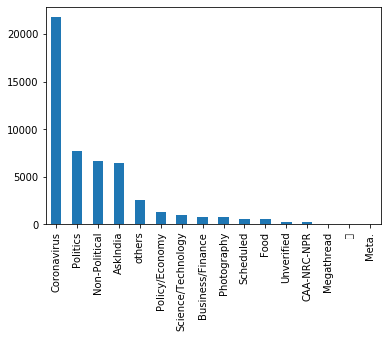

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
%matplotlib inline
rposts.flair.value_counts().plot(kind='bar')

In [18]:
filtered = rposts.drop_duplicates()

In [19]:
filtered

,title,flair,score,num_comments,created
0,Stones Thrown At Karnataka Cops For Stopping P...,Coronavirus,106,9,1586239237000
1,Interested in gaining a new perspective on thi...,others,0,0,1518053184000
2,"Government lifts ban on export of key APIs, vi...",Coronavirus,6,0,1586238808000
3,Coronavirus | Municipalities using Smart Citie...,Coronavirus,6,0,1586238733000
4,"Muslims Spitting on Food, Hiding in Mosques to...",Coronavirus,130,8,1586238719000
...,...,...,...,...,...
50474,Is India Getting Better?,Non-Political,77,14,1586226023000
50520,I am an exmuslim. AMA!,Non-Political,137,245,1586193813000
50534,"As IIT, IIM students lose job offers, institut...",Policy/Economy,60,33,1586190298000
50537,"Two-week extension of lockdown in Mumbai, Pune...",Coronavirus,92,1,1586189384000


In [15]:
filtered.flair.value_counts()

Coronavirus           3164
Politics              1409
Non-Political         1007
AskIndia               653
Policy/Economy         248
Scheduled              112
Photography            100
Business/Finance        92
others                  81
Unverified              65
Science/Technology      57
Food                    51
CAA-NRC-NPR             41
Megathread              12
🥳                        9
Meta.                    3
Name: flair, dtype: int64

In [10]:
rposts = []
import pandas as pd
import numpy as np
import urllib.request, json
from selenium import webdriver
BASE_URL = "https://www.reddit.com/r/india/new/"
URL1 = "https://gateway.reddit.com/desktopapi/v1/subreddits/india?rtj=only&redditWebClient=web2x&app=web2x-client-production&allow_over18=&include=identity&after="
token = "t3_fyww4t"
dist = 6
URL2 = "&layout=card&sort=new&geo_filter=IN"
driver = webdriver.Chrome('/Users/sidhartha7/Downloads/chromedriver')
driver.get(BASE_URL)

# URL = URL1 + str(token) + "&dict=" + str(count%10) + URL2
while(len(rposts) < 100000):
    print(len(rposts))
    URL =  URL1 + str(token) + "&dist=" + str(dist) + URL2 
    bar_length = 30
    percent = float(len(rposts)) / 30000
    arrow = '-' * int(round(percent * bar_length)-1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write("\rPercent: [{0}] {1}%".format(arrow + spaces, int(round(percent * 100))))
    sys.stdout.flush()
    
    try:
        with urllib.request.urlopen(URL) as url:
            data = json.loads(url.read().decode())
            #print(type(data['posts']))
            jsonData = data['posts']
            for post in jsonData:
                if(len(post) == 9):
                    #print(post)
                    if(len(jsonData[post]['flair']) != 0 ):
                        count+=1
                        rposts.append([jsonData[post]['title'],jsonData[post]['flair'][1]['text'], jsonData[post]['score'],  jsonData[post]['numComments'], jsonData[post]['created']])
                    else:
                        count+=1
                        rposts.append([jsonData[post]['title'],'others', jsonData[post]['score'],  jsonData[post]['numComments'], jsonData[post]['created']])
            token = data['token']
            dist = data['dist']
            
    except:
        #SELENIUM WEB DRIVER TO LOAD CONTINUOUS PAGE
        driver.execute_script("window.scrollTo(0, window.scrollY + 80000)")
        
        
rposts = pd.DataFrame(rposts,columns=['title','flair', 'score',   'num_comments',  'created'])
rposts

0


NameError: name 'bar_length' is not defined

<pre>
Scraping data based on date parameter
</pre>

In [5]:

subreddit = reddit.subreddit('india')

topics_dict = { "title":[], \
                "score":[], \
                "id":[], "url":[], \
                "comms_num": [], \
                "created": [], \
                "body":[]}

for submission in subreddit.submissions(1533081600, 1535760000):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

topics_data = pd.DataFrame(topics_dict)

TypeError: Exactly one of collection_id or permalink must be provided.

In [6]:
import requests
import praw
import time
import pandas as pd
# Authentication: http://praw.readthedocs.io/en/latest/getting_started/authentication.html
# reddit = praw.Reddit(client_id='SI8pN3DSbt0zor', client_secret='xaxkj7HNh8kwg8e5t4m6KvSrbTI',
#                      password='1guiwevlfo00esyy', user_agent='testscript by /u/fakebot3',
#                      username='fakebot3')

def submissions_pushshift_praw(subreddit, start=None, end=None, limit=100, extra_query=""):
    """
    A simple function that returns a list of PRAW submission objects during a particular period from a defined sub.
    This function serves as a replacement for the now deprecated PRAW `submissions()` method.
    
    :param subreddit: A subreddit name to fetch submissions from.
    :param start: A Unix time integer. Posts fetched will be AFTER this time. (default: None)
    :param end: A Unix time integer. Posts fetched will be BEFORE this time. (default: None)
    :param limit: There needs to be a defined limit of results (default: 100), or Pushshift will return only 25.
    :param extra_query: A query string is optional. If an extra_query string is not supplied, 
                        the function will just grab everything from the defined time period. (default: empty string)
    
    Submissions are yielded newest first.
    
    For more information on PRAW, see: https://github.com/praw-dev/praw 
    For more information on Pushshift, see: https://github.com/pushshift/api
    """
    matching_praw_submissions = []
    
    # Default time values if none are defined (credit to u/bboe's PRAW `submissions()` for this section)
    utc_offset = 28800
    now = int(time.time())
    start = max(int(start) + utc_offset if start else 0, 0)
    end = min(int(end) if end else now, now) + utc_offset
    
    # Format our search link properly.
    search_link = ('https://api.pushshift.io/reddit/submission/search/'
                   '?subreddit={}&after={}&before={}&sort_type=score&sort=asc&limit={}&q={}')
    search_link = search_link.format(subreddit, start, end, limit, extra_query)
    
    # Get the data from Pushshift as JSON.
    retrieved_data = requests.get(search_link)
    returned_submissions = retrieved_data.json()['data']
    
    # Iterate over the returned submissions to convert them to PRAW submission objects.
    for submission in returned_submissions:
        
        # Take the ID, fetch the PRAW submission object, and append to our list
        praw_submission = reddit.submission(id=submission['id'])
        matching_praw_submissions.append(praw_submission)
     
    # Return all PRAW submissions that were obtained.
    return matching_praw_submissions

In [7]:
posts = []

#  APRIL 2020   
print("\n# Example 1")  # Simple query with just times and a subreddit.
end_time_utc = 1587041206
start_time_utc = end_time_utc - 100000
diff = 50000
count = 1
#     print(type(diff))
#     print(type(start_time_utc))
while(start_time_utc > 1585744949):
    print("posts collectes:"+str(len(posts))+"  utc:"+ str(start_time_utc))
    for data in submissions_pushshift_praw('india',start_time_utc, end_time_utc, 1000):
        posts.append([str(data.title)+str(data.selftext),data.created_utc, data.link_flair_background_color, data.link_flair_text, data.link_flair_text_color , data.num_comments, data.score ])
        if(count % 50 == 0):
            print(count)
        count += 1

    end_time_utc = start_time_utc
    start_time_utc = start_time_utc - diff



posts = pd.DataFrame(posts, columns = ['text', 'created_utc', 'flair_colour', 'flair', 'flair_text_colour', 'num_comments', 'score'])
posts.tail()
posts.to_csv('APR_2020_R_INDIA.csv')

# #     print("\n# Example 2")  # Contains a specific query.
# #     for submission in submissions_pushshift_praw(subreddit='translator', start=1514793600, end=1514880000, 
# #                                                  extra_query="French"):
# #         print(submission.title)    
    
#     print("\n# Example 3")  # Just a subreddit specified.
#     for data in submissions_pushshift_praw('india'):
#         print(data.link_flair_background_color) 
#         print(data.link_flair_text_color)
#         print(str(data.title)+str(data.selftext))
#         print(data.created_utc)
#         print(data.flair)

# example_bot()



# Example 1
posts collectes:0  utc:1586941206
50
posts collectes:84  utc:1586891206
100
150
200
250
300
350
400
450
posts collectes:478  utc:1586841206
500
550
600
650
posts collectes:699  utc:1586791206
700
750
800
850
900
950
1000
1050
posts collectes:1075  utc:1586741206
1100
1150
1200
1250
1300
1350
posts collectes:1386  utc:1586691206
1400
1450
1500
1550
1600
posts collectes:1629  utc:1586641206
1650
1700
1750
1800
1850
1900
1950
2000
posts collectes:2027  utc:1586591206
2050
2100
2150
2200
posts collectes:2247  utc:1586541206
2250
2300
2350
2400
2450
2500
2550
2600
posts collectes:2625  utc:1586491206
2650
2700
2750
2800
2850
2900
posts collectes:2910  utc:1586441206
2950
3000
3050
3100
3150
posts collectes:3179  utc:1586391206
3200
3250
3300
3350
3400
3450
3500
posts collectes:3516  utc:1586341206
3550
3600
3650
3700
posts collectes:3722  utc:1586291206
3750
3800
3850
3900
3950
4000
4050
posts collectes:4073  utc:1586241206
4100
4150
4200
4250
posts collectes:4294  utc:15861912

In [15]:
posts = pd.DataFrame(posts, columns = ['text', 'created_utc', 'flair_colour', 'flair', 'flair_text_colour', 'num_comments', 'score'])
posts.tail()
posts.to_csv('APR_2020_R_INDIA.csv')

,text,created_utc,flair_colour,flair,flair_text_colour,num_comments,score
0,Aarogya Setu application becomes world's faste...,1.586962e+09,,| Repost |,dark,2,0
1,Rest In Peace Our Hero,1.586946e+09,#5093d6,Non-Political,dark,0,0
2,Rampage,1.586978e+09,,| Unverified Content / Disreputed Source |,dark,0,0
3,Funny how you won't find this news being share...,1.586985e+09,,Coronavirus,dark,1,0
4,Sounds like it is upto states like Kerala and ...,1.586947e+09,,| Not Original/Relevant Title |,dark,0,0
...,...,...,...,...,...,...,...
102,Thank at least one person you know who is in t...,1.586928e+09,,Coronavirus,dark,0,1
103,Let's solve corona crisis together[removed],1.586930e+09,,Coronavirus,dark,1,0
104,Would you agree that Congress party would have...,1.586926e+09,#ab494b,AskIndia,light,0,0
105,"In this Punjab village, Sikhs are shedding the...",1.586943e+09,,Coronavirus,dark,0,0
